# analyze the geography of the campgrounds
1. group campgrounds together based on latitude and logitude
2. map campgrounds and groupings onto GIS map

## 1. Group campgrounds

In [5]:
import pandas as pd
import analyze_campgrounds as ac
from matplotlib import pyplot as plt
import random
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('./scraped_campgrounds.csv')

In [3]:
result = df.groupby('Forest').apply(ac.group_points)

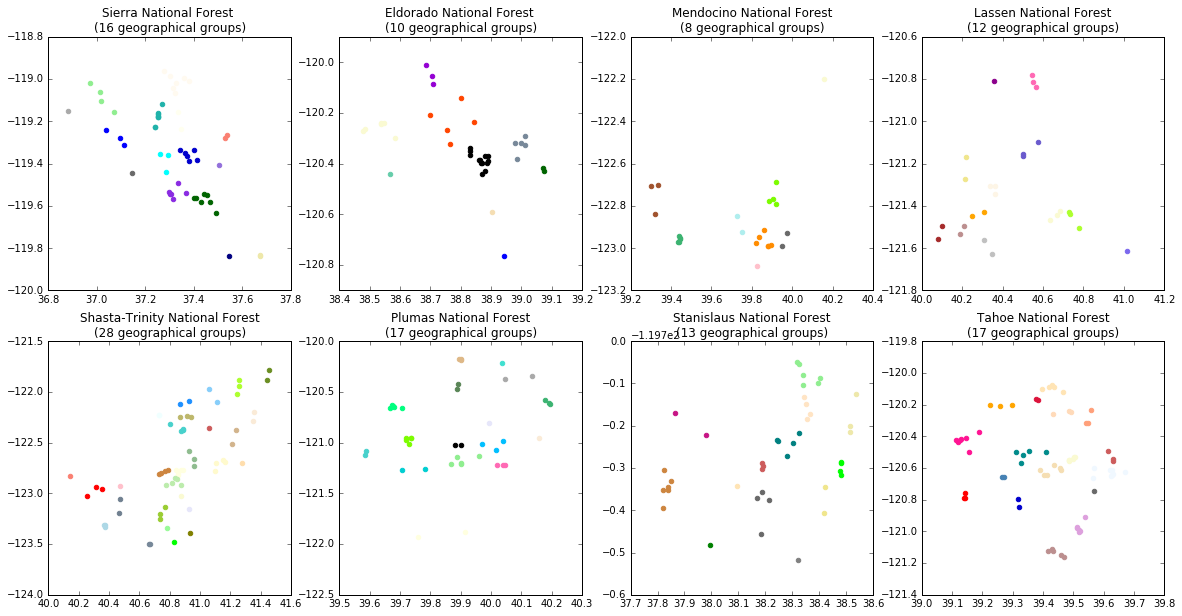

In [16]:
fig, ax = plt.subplots(2, 4)
axs = ax.ravel()
for i, forest in enumerate(df['Forest'].unique()):
    slc = result[result['Forest'] == forest]
    n_colors = len(slc['Geo Group'].unique())
    colors = random.sample(matplotlib.colors.cnames.keys(), n_colors)
    axs[i].set_title('{}\n({} geographical groups)'.format(forest, n_colors))
    for j, group in enumerate(slc['Geo Group'].unique()):
        coords = slc[slc['Geo Group'] == group][['Latitude', 'Longitude']].values
        axs[i].scatter(coords[:, 0], coords[:, 1], color=colors[j])
    
fig.set_size_inches(20, 10)
plt.show()